How many light verbs are too many?

In [1]:
import nltk

In [2]:
# First, let's grab a function to find the number of light verbs

In [3]:
# Here's out text
text = "Call me Ishmael. Some years ago- never mind how long precisely- having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world. It is a way I have of driving off the spleen and regulating the circulation. Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people's hats off- then, I account it high time to get to sea as soon as I can."

In [4]:
# Now let's find the tokens
def tokinze_text(raw_text):
    tokens = nltk.word_tokenize(raw_text)
    return tokens

tokens = tokinze_text(text)
print(tokens)

['Call', 'me', 'Ishmael', '.', 'Some', 'years', 'ago-', 'never', 'mind', 'how', 'long', 'precisely-', 'having', 'little', 'or', 'no', 'money', 'in', 'my', 'purse', ',', 'and', 'nothing', 'particular', 'to', 'interest', 'me', 'on', 'shore', ',', 'I', 'thought', 'I', 'would', 'sail', 'about', 'a', 'little', 'and', 'see', 'the', 'watery', 'part', 'of', 'the', 'world', '.', 'It', 'is', 'a', 'way', 'I', 'have', 'of', 'driving', 'off', 'the', 'spleen', 'and', 'regulating', 'the', 'circulation', '.', 'Whenever', 'I', 'find', 'myself', 'growing', 'grim', 'about', 'the', 'mouth', ';', 'whenever', 'it', 'is', 'a', 'damp', ',', 'drizzly', 'November', 'in', 'my', 'soul', ';', 'whenever', 'I', 'find', 'myself', 'involuntarily', 'pausing', 'before', 'coffin', 'warehouses', ',', 'and', 'bringing', 'up', 'the', 'rear', 'of', 'every', 'funeral', 'I', 'meet', ';', 'and', 'especially', 'whenever', 'my', 'hypos', 'get', 'such', 'an', 'upper', 'hand', 'of', 'me', ',', 'that', 'it', 'requires', 'a', 'strong

In [5]:
# OK, that grabbed everything. Let's just extract the words
words = []
word2token_map = []
# While we're going through everything, let's also extract the punctuation
puncs = []
punc2token_map = []
for idx, token in enumerate(tokens):
    # Use "isalnum" to check if character is alphanumberic (decimal or letter, aka not punctuation)
    if token[0].isalnum() or (token in ["'m", "'re", "'ve", "'d", "'ll"]):
        words.append(token.lower())
        word2token_map.append(idx)
    else:
        puncs.append(token)
        punc2token_map.append(idx)
            
print(words)
print(word2token_map)

['call', 'me', 'ishmael', 'some', 'years', 'ago-', 'never', 'mind', 'how', 'long', 'precisely-', 'having', 'little', 'or', 'no', 'money', 'in', 'my', 'purse', 'and', 'nothing', 'particular', 'to', 'interest', 'me', 'on', 'shore', 'i', 'thought', 'i', 'would', 'sail', 'about', 'a', 'little', 'and', 'see', 'the', 'watery', 'part', 'of', 'the', 'world', 'it', 'is', 'a', 'way', 'i', 'have', 'of', 'driving', 'off', 'the', 'spleen', 'and', 'regulating', 'the', 'circulation', 'whenever', 'i', 'find', 'myself', 'growing', 'grim', 'about', 'the', 'mouth', 'whenever', 'it', 'is', 'a', 'damp', 'drizzly', 'november', 'in', 'my', 'soul', 'whenever', 'i', 'find', 'myself', 'involuntarily', 'pausing', 'before', 'coffin', 'warehouses', 'and', 'bringing', 'up', 'the', 'rear', 'of', 'every', 'funeral', 'i', 'meet', 'and', 'especially', 'whenever', 'my', 'hypos', 'get', 'such', 'an', 'upper', 'hand', 'of', 'me', 'that', 'it', 'requires', 'a', 'strong', 'moral', 'principle', 'to', 'prevent', 'me', 'from',

In [6]:
# Let's make a single function to determine the parts of speech
# We'll use this to copy and paste from other notebooks

import re
import nltk
import os
#from collections import Counter # Is this used?

# First we break the text into tokens
def tokinze_text(raw_text):
    tokens = nltk.word_tokenize(raw_text)
    return tokens
tokens = tokinze_text(text)

def mytagger(tokens):
    '''This function inputs tokens'''
    tags = nltk.pos_tag(tokens)
    return tags

tagged = mytagger(tokens)

# Note that IN can be either a preposition or a conjunction, for now we're going to list it with the prepositions
common_noun_pos = ['NN', 'NNS']
common_nouns = []
verb_pos = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
verbs=[]
adjective_pos = ['JJ', 'JJR', 'JJS']
adjectives = []
pronoun_pos = ['PRP', 'PRP$', 'WP', 'WP$']
pronouns = []
adverb_pos = ['RB', 'RBR', 'RBS', 'WRB']
adverbs = []
proper_noun_pos = ['NNP', 'NNPS']
proper_nouns = []
conjunction_pos = ['CC']
conjunctions = []
preposition_pos = ['IN', 'TO']
prepositions = []
interjection_pos = ['UH']
interjections = []
modal_pos = ['MD'] # But these are also verbs, so let's make sure they show up as such
modals = []
tagged_other_pos = ['CD', 'DT', 'EX', 'FW', 'LS', 'PDT', 'POS', 'RP', 'SYM', 'WDT']
tagged_others = []
other = []

for idx, token in enumerate(tagged):
    if token[1] in common_noun_pos:
        common_nouns.append(token)
    elif token[1] in verb_pos:
        verbs.append(token)
    elif token[1] in adjective_pos:
        adjectives.append(token)
    elif token[1] in pronoun_pos:
        pronouns.append(token)
    elif token[1] in adverb_pos:
        adverbs.append(token)
    elif token[1] in proper_noun_pos:
        proper_nouns.append(token)
    elif token[1] in conjunction_pos:
        conjunctions.append(token)
    elif token[1] in preposition_pos:
        prepositions.append(token)
    elif token[1] in interjection_pos:
        interjections.append(token)
    elif token[1] in modal_pos:
        modals.append(token)
    elif token[1] in tagged_other_pos:
        tagged_others.append(token)
    else:
        other.append(token)
    

parts_of_speech = [common_nouns, verbs, adjectives, pronouns, adverbs, proper_nouns, conjunctions, prepositions, interjections, modals]
   
# Apped modals to verbs
# Create nouns that is both proper nouns and common nouns

In [7]:
# Let's grab our list of all the light verbs
file = 'corpora/light_verbs.txt'
with open(file, 'r') as f:
    light_verbs = f.read().splitlines()
print(light_verbs)

['be', 'am', "'m", 'is', 'are', "'re", 'wa', 'were', 'been', 'have', 'ha', 'had', "'ve", 'do', 'doe', 'did', 'done', 'go', 'goe', 'went', 'gone', 'give', 'gave', 'given', 'put', 'take', 'took', 'taken', 'feel', 'felt', 'begin', 'began', 'begun', 'get', 'got', 'make', 'put', '']


In [9]:
# But you should be comparing stems, so find the stems for all these first
# Before we do any stemming, let's make a list of all the irregular word stems
with open(os.path.join(os.path.dirname(os.getcwd()), 'StyleStudio/corpora/irregular-stems')) as f:
    dict_irregular_stems_lines = f.read().splitlines()
    dict_irregular_stems_draft = [line.split(',') for line in dict_irregular_stems_lines]
    dict_irregular_stems = {}
    for stem_old, stem_new in dict_irregular_stems_draft:
        dict_irregular_stems[stem_old] = stem_new

In [10]:
# Now let's create a stemmer
stemmer = nltk.PorterStemmer()
def stem_better(word):
    stem = stemmer.stem(word.lower())
    if stem in dict_irregular_stems:
        stem = dict_irregular_stems[stem]
    return stem

In [11]:
# OK, now let's put all the stems inside the data dictionary
data = {}
stems = [stem_better(word) for word in words]
data['stems'] = [None] * len(tokens)
for idx, stem in enumerate(stems):
    data['stems'][word2token_map[idx]] = stem

In [15]:
'''# OK, now we've got our list of light verb stems, and our stems of all our words (data['stems']), 
# let's see what light verbs we have

lt_vrb = []
for x in range(len(verbs)):
    if verbs[x] in light_verbs:
        lt_vrb.append(verbs[x])
print(lt_vrb)'''

"# OK, now we've got our list of light verb stems, and our stems of all our words (data['stems']), \n# let's see what light verbs we have\n\nlt_vrb = []\nfor x in range(len(verbs)):\n    if verbs[x] in light_verbs:\n        lt_vrb.append(verbs[x])\nprint(lt_vrb)"

In [16]:
#light_verbs

In [17]:
# Now let's enumerate through the word tokens and find the light verbs
light = [None] * len(tokens)
verb_pos = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
for idx_word, word in enumerate(words):
    idx = word2token_map[idx_word]
    #print(tagged[idx][1])
    light[idx] = (tagged[idx][1] in verb_pos) and (data['stems'][idx] in light_verbs)
print(light)

[False, False, False, None, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, None, False, False, False, False, False, False, False, False, None, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, None, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, None, False, False, False, False, False, False, False, False, False, None, False, False, True, False, False, None, False, False, False, False, False, None, False, False, False, False, False, False, False, False, False, None, False, False, False, False, False, False, False, False, False, False, None, False, False, False, False, False, True, False, False, False, False, False, False, None, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, None, False, False, False, False, None, False, False, False, None, Fal

In [18]:
# Now let's print all the light verbs
from itertools import compress
light_verbs_in_text = list(compress(tokens, light))
print(light_verbs_in_text)
# Now let's look where they are in the text
light_verbs_posi = [i for i, x in enumerate(light) if x]
print(light_verbs_posi)

['having', 'is', 'have', 'is', 'get', 'get']
[12, 48, 52, 75, 111, 151]


In [19]:
# Next: find and print the entire sentence
# Then: Compare to other famous authors, make a cool graph

In [20]:
# Let's grab this to look at sentences
punct_error_re = re.compile('^(["\]\)\}]+)(?:[ \n]|$)')
ellipsis_re = re.compile('\.\.\.["\(\)\[\]\{\} ] [A-Z]')
newline_re = re.compile('\n["\(\[\{ ]*[A-Z]')
empty_sent_re = re.compile('^[\n ]*$')
def sentencize(text):
    # tokenize text into sentences
    text_eg_ie = text.replace('e.g.', 'e.---g.').replace('i.e.', 'i.---e.')
    sents_draft = nltk.sent_tokenize(text_eg_ie)
    for idx, sent in enumerate(sents_draft[:]):
        sents_draft[idx] = sents_draft[idx].replace('e.---g.', 'e.g.').replace('i.---e.', 'i.e.')
        print(idx)
        if idx > 0:
            punct_error = punct_error_re.findall(sent)
            if punct_error:
                sents_draft[idx-1] += punct_error[0]
                sents_draft[idx] = sents_draft[idx][len(punct_error[0])+1:]
                print(idx)

    # separate sentences at ellipsis characters correctly
    sents_draft_2 = []
    for sent in sents_draft:
        idx = 0
        for ellipsis_case in ellipsis_re.finditer(sent):
            sents_draft_2.append(sent[idx:(ellipsis_case.start() + 3)])
            idx = ellipsis_case.start() + 3
            print(idx)
        sents_draft_2.append(sent[idx:])

    # separate sentences at newline characters correctly
    sents = []
    for sent in sents_draft_2:
        idx = 0
        for newline_case in newline_re.finditer(sent):
            print("Now Im here") # is this even being used?
            sents.append(sent[idx:(newline_case.start() + 1)])
            idx = newline_case.start() + 1
            print(idx)
        sents.append(sent[idx:])

    # delete empty sentences
    sents = [sent for sent in sents if not empty_sent_re.match(sent)]
    return sents

In [21]:
sents = sentencize(text)

0
1
2
3


In [22]:
sents

['Call me Ishmael.',
 'Some years ago- never mind how long precisely- having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world.',
 'It is a way I have of driving off the spleen and regulating the circulation.',
 "Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people's hats off- then, I account it high time to get to sea as soon as I can."]

In [23]:
# What I'm trying to do now is find and print the sentence that goes with the word I've suggested

In [24]:
# OK, so next we'll assign every word a sentence number
# tokenize sentences into words and punctuation marks
sents_tokens = [nltk.word_tokenize(sent) for sent in sents]
tokens = [token for sent in sents_tokens for token in sent]
data['values'] = tokens
# Now let's give every word a sentence number. All the words in the first sentence have a value
#  of 1, second sentence 2, etc.
data['sentence_numbers'] = [(idx+1) for idx, sent in enumerate(sents_tokens) for token in sent]

In [25]:
#OK, now we've got our light words:
print(light_verbs_in_text)
# We've also got our position of each word
print(light_verbs_posi)
# And, finally, we've got our sentence numbers:
print(data['sentence_numbers'])

['having', 'is', 'have', 'is', 'get', 'get']
[12, 48, 52, 75, 111, 151]
[1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [26]:
# OK, there might be some extra stuff above, but let's get back on topic
# We're going to find the ratio of light verbs to total words for this book

Let's grab the beginning of Great Expectations

In [29]:
# Let's grab some of Great Expectations, maybe the first 10000 characters?
import re
from urllib import request

# Now let's grab some text from Great Expectations
url = 'http://www.gutenberg.org/files/1400/1400-0.txt'
response = request.urlopen(url)
raw = response.read().decode('utf8')


Here is some text we'll start with.

In [30]:
text = raw[886:] # Jumping to where it actually starts
# Let's clean out all the annoying line markings
text = text.replace('\r', '')
text = text.replace('\n', ' ')
#print(text)

In [31]:
# Let's see what percentage of these words are light verbs
# First we have to tokenize
tokens = tokinze_text(text)
# Then we have to extract the words. We'll ignore punctuation for now
words = []
word2token_map = []
for idx, token in enumerate(tokens):
    # Use "isalnum" to check if character is alphanumberic (decimal or letter, aka not punctuation)
    if token[0].isalnum() or (token in ["'m", "'re", "'ve", "'d", "'ll"]):
        words.append(token.lower())
        word2token_map.append(idx)

In [32]:
# Now we have to tag all the words
tagged = mytagger(tokens)

In [33]:
# We'll make a function out of the last step
def find_light_verbs(tokens, words):
    # Let's enumerate through the word tokens and find the light verbs
    light = [None] * len(tokens)
    verb_pos = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
    for idx_word, word in enumerate(words):
        idx = word2token_map[idx_word]
        #print(tagged[idx][1])
        light[idx] = (tagged[idx][1] in verb_pos)# and (data['stems'][idx] in light_verbs)
    return light

In [34]:
light_verbs = find_light_verbs(tokens, words) # using light and light interchangeably; bad!

In [35]:
# Let's delete all the None values
cleaned = [x for x in light_verbs if x is not None]
print("There are {} light verbs in this text".format(sum(cleaned)))
print("That is {:.2%} of words in this text".format(sum(cleaned)/len(light_verbs)))

There are 36584 light verbs in this text
That is 15.89% of words in this text


In [36]:
# Now let's do the same for Moby Dick
url = 'http://www.gutenberg.org/files/2701/2701-0.txt'
beginning = 28876
def light_verbs_in_book(url, beginning):
    response = request.urlopen(url)
    raw = response.read().decode('utf8')
    # Here is some text we'll start with
    text = raw[beginning:] # Jump to the beginning
    # Let's clean out all the annoying line markings
    text = text.replace('\r', '')
    text = text.replace('\n', ' ')


    # First we have to tokenize
    tokens = tokinze_text(text)
    # Then we have to extract the words. We'll ignore punctuation for now
    words = []
    word2token_map = []
    for idx, token in enumerate(tokens):
        # Use "isalnum" to check if character is alphanumberic (decimal or letter, aka not punctuation)
        if token[0].isalnum() or (token in ["'m", "'re", "'ve", "'d", "'ll"]):
            words.append(token.lower())
            word2token_map.append(idx)
            
    # Now we have to tag all the words
    tagged = mytagger(tokens)  
    
    light_verbs = find_light_verbs(tokens, words)
    
    cleaned = [x for x in light_verbs if x is not None]
    print("There are {} light verbs in this text".format(sum(cleaned)))
    print("That is {:.2%} of words in this text".format(sum(cleaned)/len(light_verbs)))

In [43]:
#light_verbs_in_book(url, beginning)

In [38]:
# Now let's do the same for Moby Dick
url = 'http://www.gutenberg.org/files/2701/2701-0.txt'
beginning = 28876

response = request.urlopen(url)
raw = response.read().decode('utf8')
# Here is some text we'll start with
text = raw[beginning:] # Jump to the beginning
# Let's clean out all the annoying line markings
text = text.replace('\r', '')
text = text.replace('\n', ' ')


# First we have to tokenize
tokens = tokinze_text(text)
# Then we have to extract the words. We'll ignore punctuation for now
words = []
word2token_map = []
for idx, token in enumerate(tokens):
    # Use "isalnum" to check if character is alphanumberic (decimal or letter, aka not punctuation)
    if token[0].isalnum() or (token in ["'m", "'re", "'ve", "'d", "'ll"]):
        words.append(token.lower())
        word2token_map.append(idx)

# Now we have to tag all the words
tagged = mytagger(tokens)  

light_verbs = find_light_verbs(tokens, words)

cleaned = [x for x in light_verbs if x is not None]
print("There are {} light verbs in this text".format(sum(cleaned)))
print("That is {:.2%} of words in this text".format(sum(cleaned)/len(light_verbs)))

There are 33245 light verbs in this text
That is 13.11% of words in this text


In [39]:
# Should this be out off all words or just verbs? I think verbs
# OK, so let's look at how many are words. We should also do a part of speech break down

In [40]:
# Let's do the part of speech break down now
# We're doing this on the Part of Speech notebook

In [41]:
# From the Part of Speech notebook:
# OK, but we haven't made a way to visual the results yet. Let's do that now with a pie chart
import matplotlib.pyplot as plt
def pos_plotter(parts_of_speech):
    '''This function inputs a specific list of lists that is shown in the Part of Speech notebook'''
    all_labels = ['common_nouns', 'verbs', 'adjectives', 'pronouns', 'adverbs', 'proper_nouns', 'conjunctions', 'prepositions', 'interjections', 'modals']
    pos_dict = dict(zip(all_labels, parts_of_speech))
    labels=[]
    data=[]
    for pos, lst in pos_dict.items():
        if lst:
            data.append(len(lst))
            labels.append(pos)
    fig1, ax1 = plt.subplots()
    ax1.pie(data, labels=labels)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

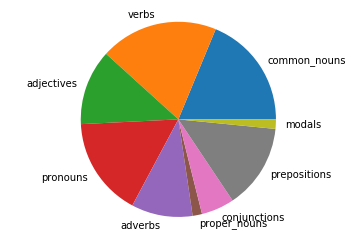

In [42]:
pos_plotter(parts_of_speech)

Now that we've worked through one example, we'll build a more formalized method of exploring other texts in [Part 2](https://jss367.github.io/Light-verbs-2/)